In [98]:
import pandas as pd
from collections import Counter
import itertools, operator
import inflect
p = inflect.engine()
import matplotlib.pyplot as plt

In [62]:
data = pd.read_json('train.json')
test_data = pd.read_json('test.json')
data_labels = data['cuisine']

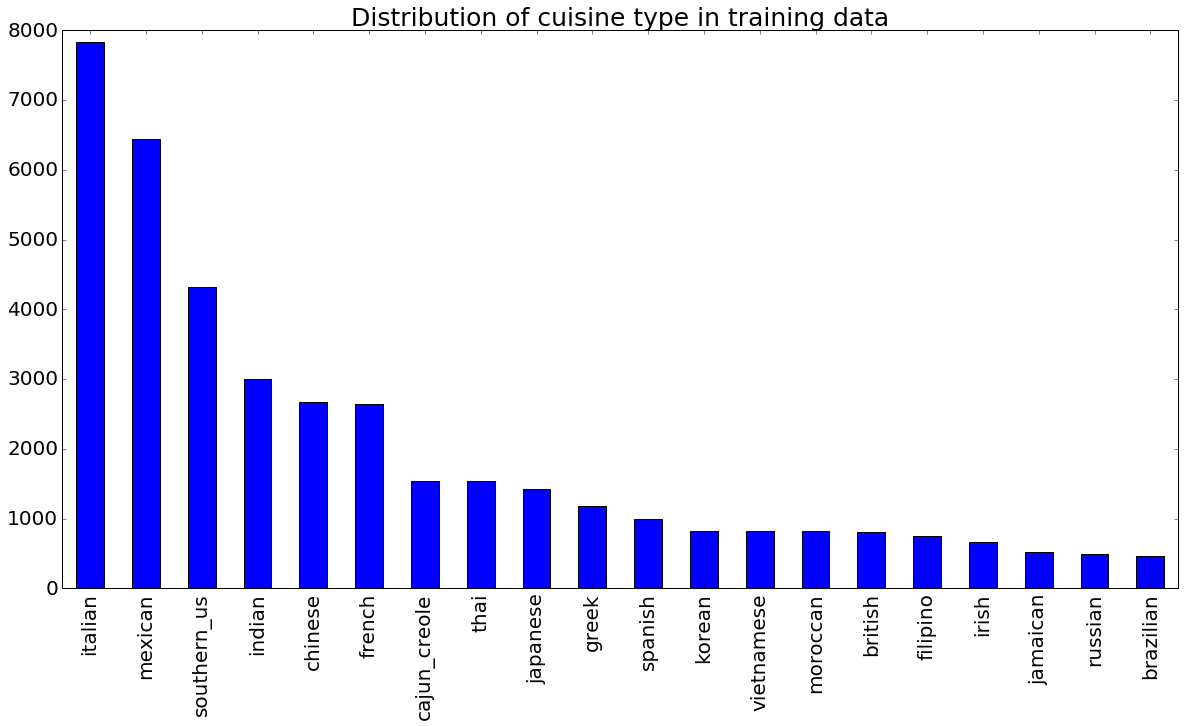

In [117]:
plt.figure(figsize=[20,10])
data_labels.value_counts().plot(kind='bar')
plt.xticks(size=20)
plt.yticks(size=20)
plt.title('Distribution of cuisine type in training data', size=25)
plt.show()

In [99]:
def encode_ascii(item):
    if isinstance(item, list):
        return [r.encode('ascii', 'ignore').lower() for r in item]
    else:
        return item.encode('ascii', 'ignore').lower()

def singular(row):
    return [p.singular_noun(i) if p.singular_noun(i) else i for i in row]

In [100]:
data_features = data['ingredients'].apply(encode_ascii).apply(singular)
flattened_ingredient_list = list(itertools.chain.from_iterable(data_features))
D = Counter(flattened_ingredient_list)
most_common_ingredients = dict(sorted(D.iteritems(), key=operator.itemgetter(1), reverse=True)[:30])

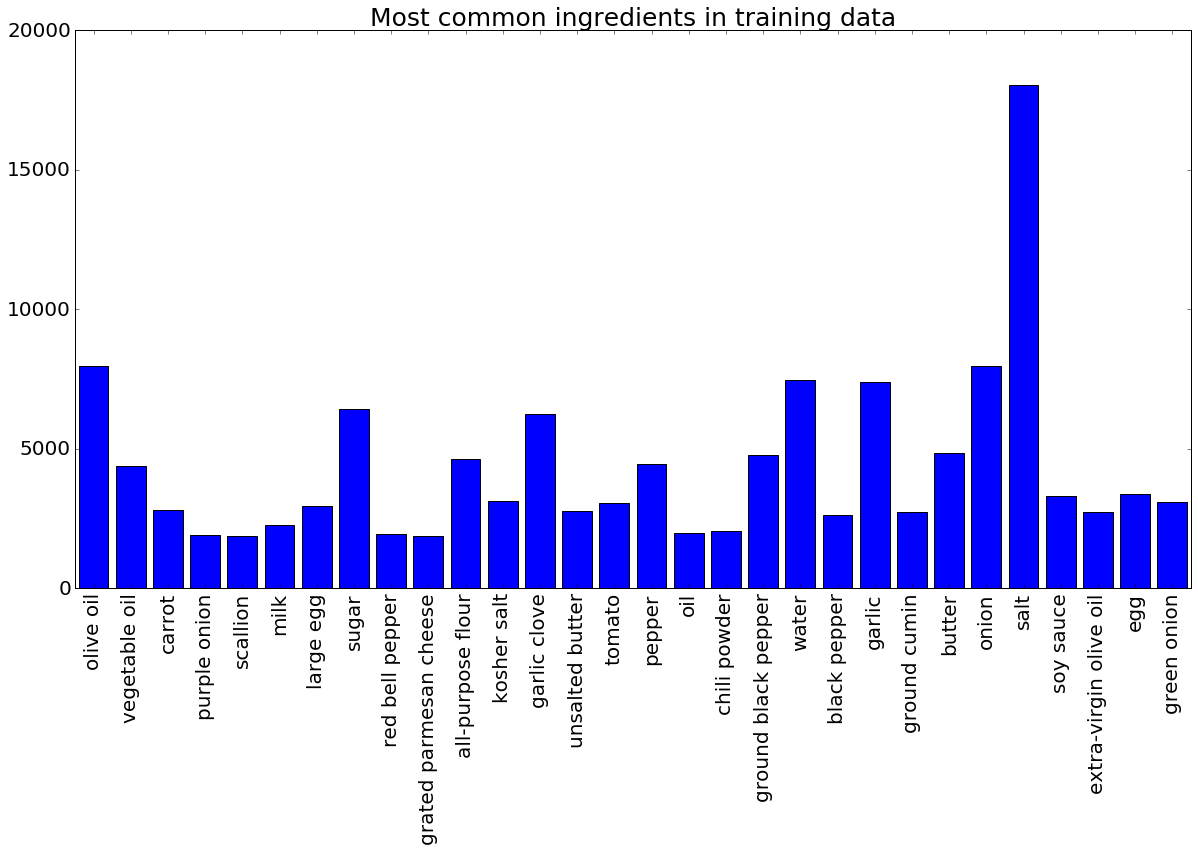

In [102]:
plt.figure(figsize=[20,10])
plt.bar(range(len(most_common_ingredients)), most_common_ingredients.values(), align='center')
plt.xticks(range(len(most_common_ingredients)), most_common_ingredients.keys(), rotation='vertical',size=20)
plt.yticks(size=20)
plt.xlim([-0.5,len(most_common_ingredients)-0.5])
plt.title('Most common ingredients in training data', size=25)
plt.show()

In [101]:
test_data_features = test_data['ingredients'].apply(encode_ascii).apply(singular)
flattened_test_ingredient_list = list(itertools.chain.from_iterable(test_data_features))
D_test = Counter(flattened_test_ingredient_list)
most_common_test_ingredients = dict(sorted(D_test.iteritems(), key=operator.itemgetter(1), reverse=True)[:30])

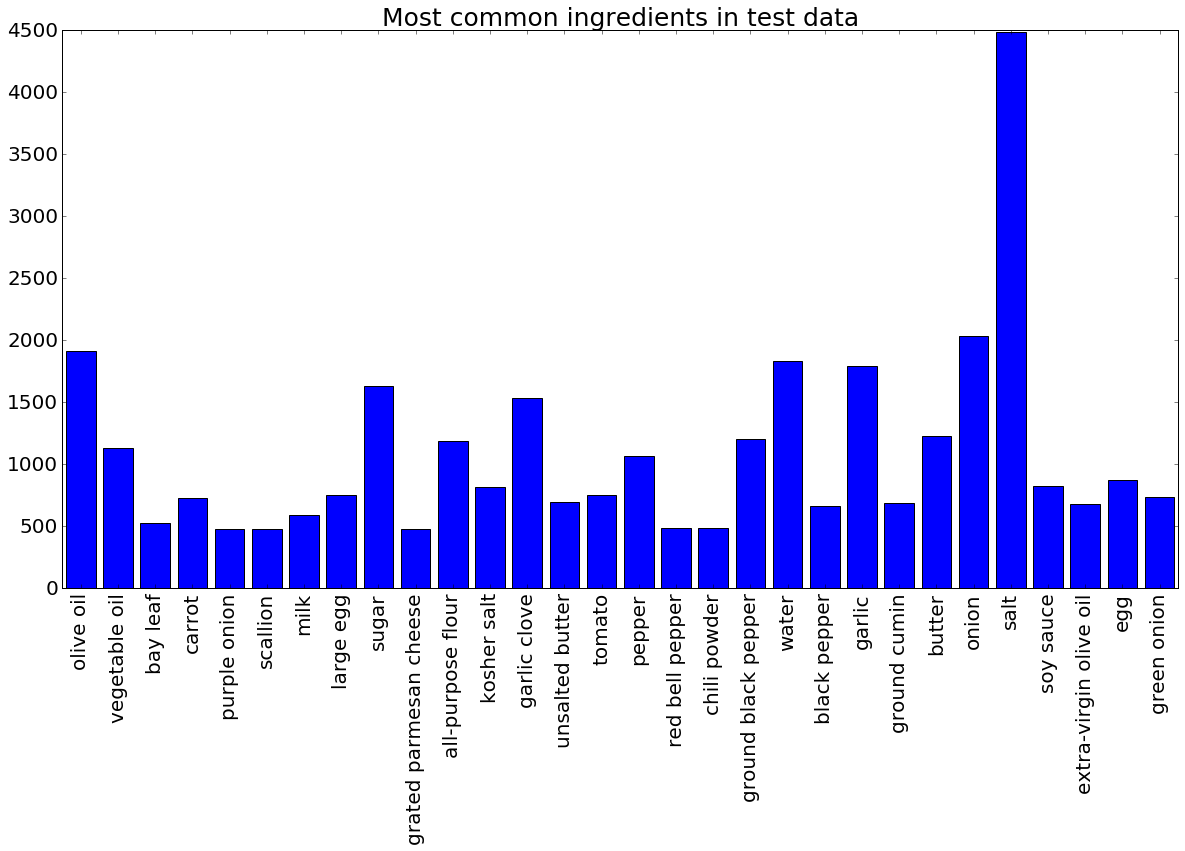

In [103]:
plt.figure(figsize=[20,10])
plt.bar(range(len(most_common_test_ingredients)), most_common_test_ingredients.values(), align='center')
plt.xticks(range(len(most_common_test_ingredients)), most_common_test_ingredients.keys(), rotation='vertical',size=20)
plt.yticks(size=20)
plt.xlim([-0.5,len(most_common_ingredients)-0.5])
plt.title('Most common ingredients in test data', size=25)
plt.show()

[0]


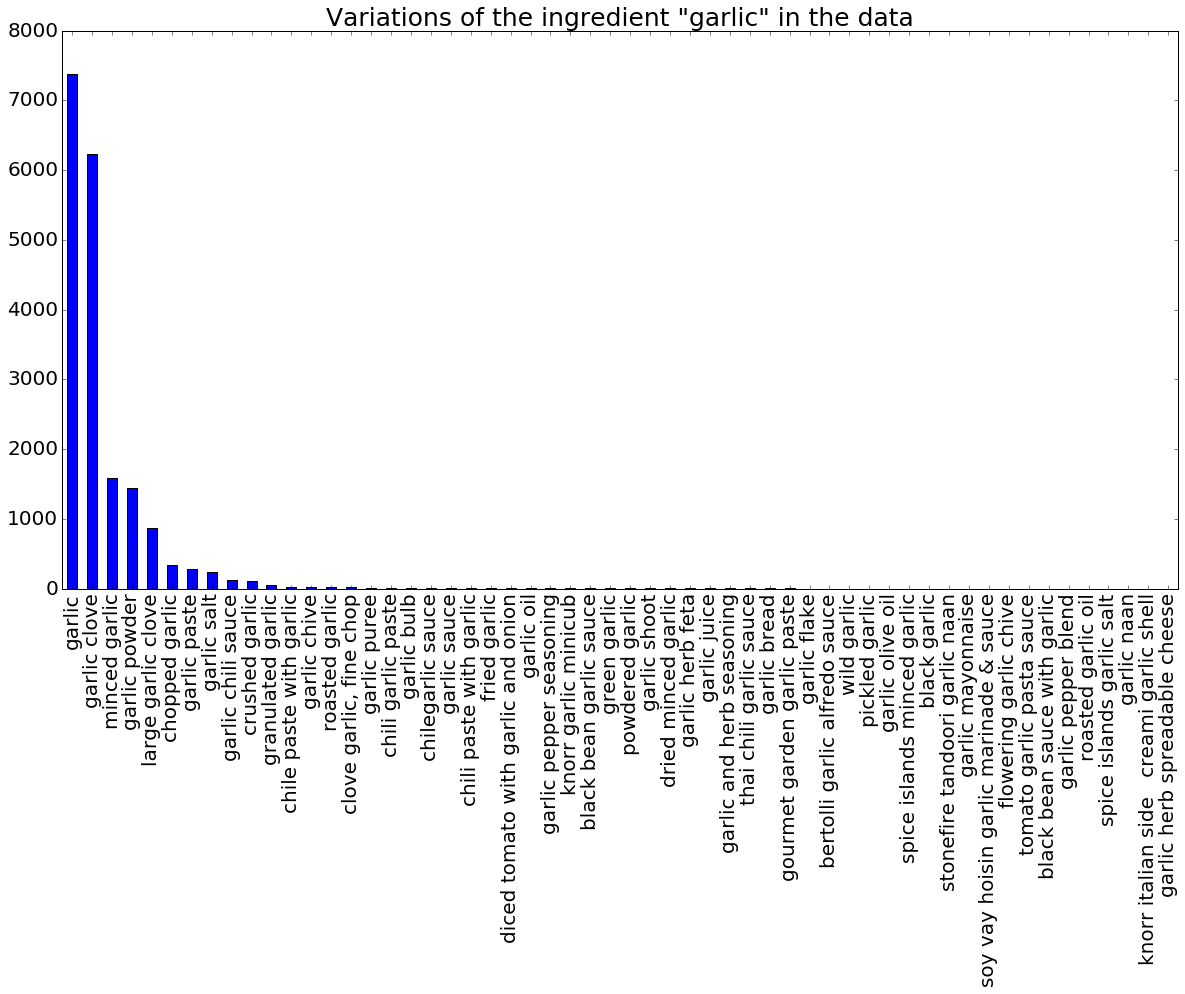

In [119]:
garlic = []
for i in flattened_ingredient_list:
    if 'garlic' in i:
        garlic.append(i)
garlic_dict = pd.DataFrame(data=garlic)  
print garlic_dict.columns.values
plt.figure(figsize=[20,10])
garlic_dict[0].value_counts().plot(kind='bar')    
plt.xticks(size=20)
plt.yticks(size=20)
plt.title('Variations of the ingredient "garlic" in the data', size=25)
plt.show()

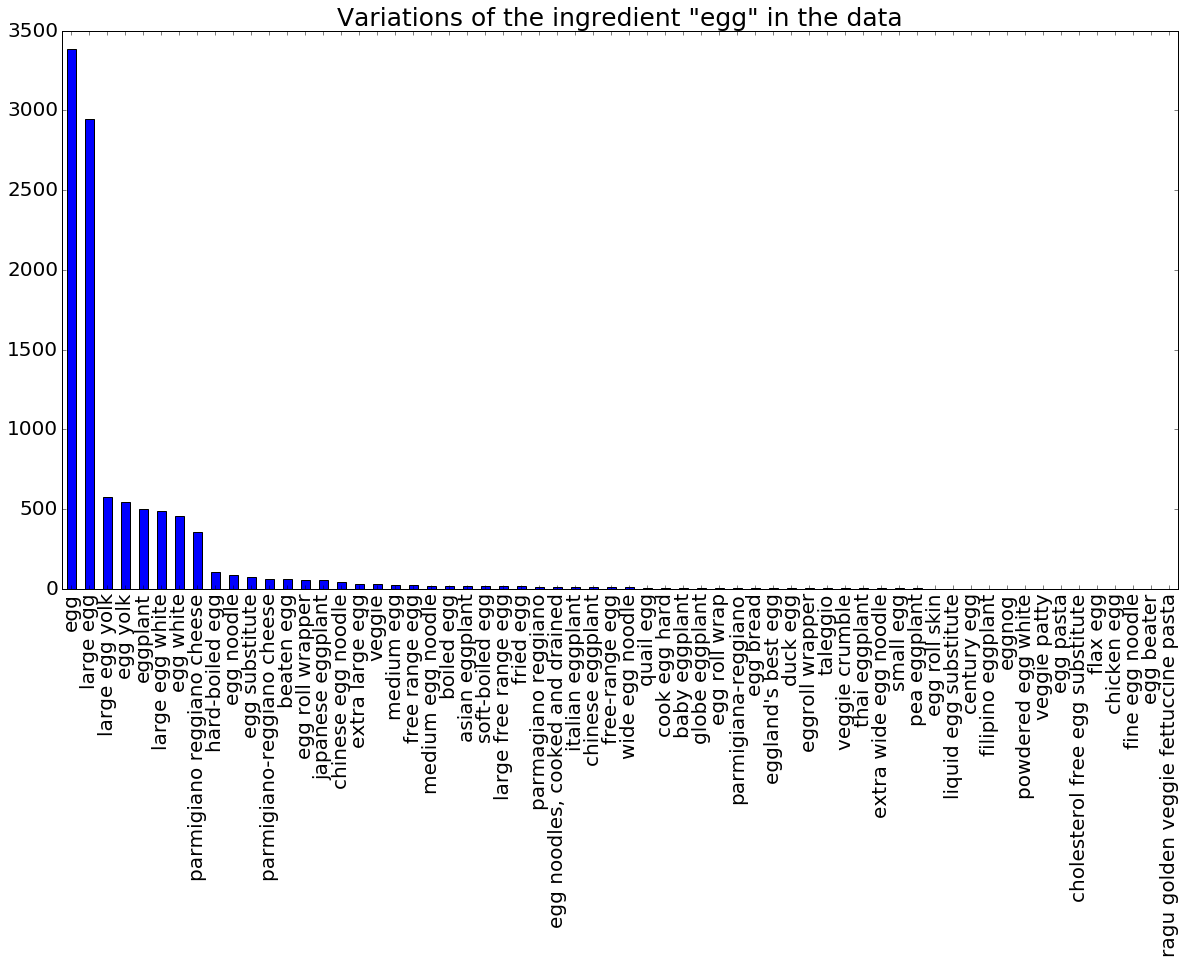

In [118]:
egg = []
for i in flattened_ingredient_list:
    if 'egg' in i:
        egg.append(i)
egg_dict = pd.DataFrame(data=egg)  
#print garlic_dict.columns.values
plt.figure(figsize=[20,10])
egg_dict[0].value_counts().plot(kind='bar')    
plt.xticks(size=20)
plt.yticks(size=20)
plt.title('Variations of the ingredient "egg" in the data', size=25)
plt.show()